## COGS 118A project Code 

In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
...


Ellipsis

## Data Import

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/COGS118A/Group045-Sp22/main/heart_2020_cleaned.csv")

In [4]:
#First Glance of the dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data Visuallization & Cleaning

In [5]:
#Check if there's any missing data in the dataset
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

The section below reshapes data into numerical values and get rid of the ranged values 

In [6]:
df = df.rename(columns={'AgeCategory': 'Age'})
df = df.replace({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0})
df['Diabetic']=df['Diabetic'].replace({'Yes (during pregnancy)': 1})
df['Diabetic']=df['Diabetic'].replace({'No, borderline diabetes': 0})
df["Age"] = df["Age"].replace({'55-59': 55, '80 or older': 80, '65-69': 65, 
                               '75-79': 75, '40-44': 40, '70-74': 70, 
                               '60-64': 60, '50-54': 50, '45-49': 45, 
                               '18-24': 18, '35-39': 35, '30-34': 30, 
                               '25-29': 25})
df = pd.concat([df,pd.get_dummies(df['Race'])], axis=1)
df = df.drop(columns=['Race'])
df['GenHealth'] = df['GenHealth'].replace({'Very good': 3, 'Poor': 0, 
                                           'Fair': 1, 'Good': 2, 'Excellent': 4})
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,30.0,0,0,55,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,75,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,...,8.0,0,0,0,0,0,0,0,0,1


Then we check the correlation of all features against the HeartDisease 

In [7]:
df.corr()['HeartDisease']

HeartDisease                      1.000000
BMI                               0.051803
Smoking                           0.107764
AlcoholDrinking                  -0.032080
Stroke                            0.196835
PhysicalHealth                    0.170721
MentalHealth                      0.028591
DiffWalking                       0.201258
Sex                               0.070040
Age                               0.232325
Diabetic                          0.174782
PhysicalActivity                 -0.100030
GenHealth                        -0.243182
SleepTime                         0.008327
Asthma                            0.041444
KidneyDisease                     0.145197
SkinCancer                        0.093317
American Indian/Alaskan Native    0.008547
Asian                            -0.030262
Black                            -0.010156
Hispanic                         -0.036163
Other                            -0.003039
White                             0.040121
Name: Heart

From here we will reduce the dimensions by deleting features that has less than 0.1 correlation with HeartDisease 

In [8]:
df = df.drop(columns=['BMI', 'AlcoholDrinking', 'MentalHealth', 'Sex', 
                      'SleepTime', 'Asthma', 'SkinCancer', 
                      'American Indian/Alaskan Native', 'Asian', 'Black',
                      'Hispanic', 'Other', 'White'])

So here is our data after cleaning process

In [9]:
df

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,Age,Diabetic,PhysicalActivity,GenHealth,KidneyDisease
0,0,1,0,3.0,0,55,1,1,3,0
1,0,0,1,0.0,0,80,0,1,3,0
2,0,1,0,20.0,0,65,1,1,1,0
3,0,0,0,0.0,0,75,0,0,2,0
4,0,0,0,28.0,1,40,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,7.0,1,60,1,0,1,0
319791,0,1,0,0.0,0,35,0,1,3,0
319792,0,0,0,0.0,0,45,0,1,2,0
319793,0,0,0,0.0,0,25,0,0,2,0


We found that we have time times more negative result than positive reult so we tried to train the model with a more balanced data 

In [10]:
pos_HD = df[df.HeartDisease == 1]
neg_HD = df[df.HeartDisease == 0]
neg_HD = neg_HD.sample(n = 27373)
df_new = pd.concat([pos_HD, neg_HD], axis=0)



# Model Code

## Decision Tree

In [11]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

In [12]:
X = df.drop(columns=['HeartDisease'])
y = df.HeartDisease
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
df.groupby('HeartDisease').count()
# Data is imbalanced

,Smoking,Stroke,PhysicalHealth,DiffWalking,Age,Diabetic,PhysicalActivity,GenHealth,KidneyDisease
HeartDisease,,,,,,,,,
0,292422,292422,292422,292422,292422,292422,292422,292422,292422
1,27373,27373,27373,27373,27373,27373,27373,27373,27373


Then we implement grid search to determine the best parameters 

In [16]:
trees = tree.DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': range(1, 12)}
grid = GridSearchCV(trees, parameters, verbose = 3)
grid.fit(X, y)
# View the Grid Search CV Results
print(grid.cv_results_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END .......................max_depth=1;, score=0.510 total time=   0.3s
[CV 2/5] END .......................max_depth=1;, score=0.516 total time=   0.7s
[CV 3/5] END .......................max_depth=1;, score=0.516 total time=   0.7s
[CV 4/5] END .......................max_depth=1;, score=0.523 total time=   0.3s
[CV 5/5] END .......................max_depth=1;, score=0.532 total time=   0.3s
[CV 1/5] END .......................max_depth=2;, score=0.717 total time=   0.4s
[CV 2/5] END .......................max_depth=2;, score=0.728 total time=   0.5s
[CV 3/5] END .......................max_depth=2;, score=0.728 total time=   0.4s
[CV 4/5] END .......................max_depth=2;, score=0.724 total time=   0.3s
[CV 5/5] END .......................max_depth=2;, score=0.717 total time=   0.4s
[CV 1/5] END .......................max_depth=3;, score=0.630 total time=   0.4s
[CV 2/5] END .......................max_depth=3;

Text(0.5, 1.0, 'Mean Accuracy across different Max Depth')

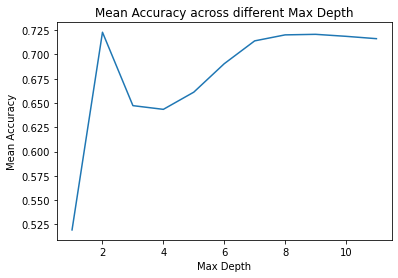

In [17]:
plt.plot(range(1,12),grid.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy across different Max Depth')

From here the best tree depth should be 7 to 9

In [18]:
clf = tree.DecisionTreeClassifier(max_depth= 8, class_weight='balanced')
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8)

[Text(0.4904764979338843, 0.9444444444444444, 'X[4] <= 52.5\ngini = 0.5\nsamples = 223856\nvalue = [111928.0, 111928.0]'),
 Text(0.24541580578512398, 0.8333333333333334, 'X[7] <= 1.5\ngini = 0.322\nsamples = 101829\nvalue = [54375.867, 13771.783]'),
 Text(0.12190082644628099, 0.7222222222222222, 'X[4] <= 37.5\ngini = 0.495\nsamples = 9811\nvalue = [4815.506, 5871.19]'),
 Text(0.06198347107438017, 0.6111111111111112, 'X[1] <= 0.5\ngini = 0.435\nsamples = 4002\nvalue = [2095.647, 985.375]'),
 Text(0.03305785123966942, 0.5, 'X[2] <= 13.5\ngini = 0.412\nsamples = 3888\nvalue = [2047.0, 838.741]'),
 Text(0.01652892561983471, 0.3888888888888889, 'X[4] <= 32.5\ngini = 0.352\nsamples = 2651\nvalue = [1410.216, 416.438]'),
 Text(0.008264462809917356, 0.2777777777777778, 'X[8] <= 0.5\ngini = 0.285\nsamples = 1890\nvalue = [1013.388, 211.152]'),
 Text(0.004132231404958678, 0.16666666666666666, 'X[4] <= 27.5\ngini = 0.278\nsamples = 1859\nvalue = [997.537, 199.421]'),
 Text(0.002066115702479339, 0

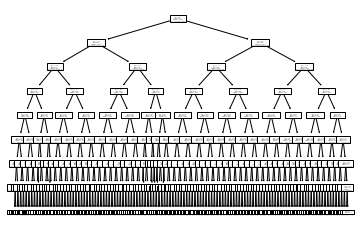

In [19]:
tree.plot_tree(clf)

In [20]:
y_pred =  clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.7273827817882925
Accuracy Score on test data:  0.7256068960485308


In [22]:
from sklearn.metrics import f1_score, recall_score
print('f1 score on train data: ', f1_score(y_true = y_train, y_pred = clf.predict(X_train)))
print('f1 score on test data: ', f1_score(y_true = y_test, y_pred = y_pred))
print('recall on train data: ', recall_score(y_true = y_train, y_pred = clf.predict(X_train)))
print('recall on test data: ', recall_score(y_true = y_test, y_pred = y_pred))

f1 score on train data:  0.3311449896428141
f1 score on test data:  0.3282553777845824
recall on train data:  0.7916470156683959
recall on test data:  0.7758745476477684


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


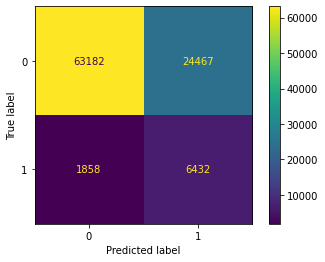

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using K- Fold cross validation, we found that the accuracy for the model lies around 71.99% to 72.63%

In [25]:
k = KFold(n_splits=10, random_state=1, shuffle=True)
#kf =KFold(n_splits=5, shuffle=True, random_state=42) just for resting out different output

scores = cross_val_score(clf,X_train,y_train, cv=k, n_jobs = -1)

print("Mean Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
print("Max Accuracy: {:.2f} %".format(scores.max()*100))



Mean Accuracy: 72.33 %
Standard Deviation: 0.34 %
Max Accuracy: 72.87 %


Next, we want to find the mean squared error

In [26]:
mse_scorer = make_scorer(mean_squared_error)
rmse_score = cross_val_score(clf, X_train,y_train, cv=k, scoring=mse_scorer)
print(f'Scores for each fold: {rmse_score}')

Scores for each fold: [0.28115787 0.27954972 0.28115787 0.27128562 0.28030912 0.27334048
 0.27572035 0.27272727 0.27585437 0.27647979]


## KNN 

In [27]:
knn = KNeighborsClassifier()
k_range = list(range(1, 35))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, scoring='accuracy',verbose=3)
  
# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.885 total time=   8.9s
[CV 2/5] END .....................n_neighbors=1;, score=0.866 total time=   8.3s
[CV 3/5] END .....................n_neighbors=1;, score=0.855 total time=   8.9s
[CV 4/5] END .....................n_neighbors=1;, score=0.868 total time=   7.8s
[CV 5/5] END .....................n_neighbors=1;, score=0.879 total time=   8.3s
[CV 1/5] END .....................n_neighbors=2;, score=0.911 total time=   8.6s
[CV 2/5] END .....................n_neighbors=2;, score=0.910 total time=   8.7s
[CV 3/5] END .....................n_neighbors=2;, score=0.910 total time=   8.5s
[CV 4/5] END .....................n_neighbors=2;, score=0.909 total time=   8.4s
[CV 5/5] END .....................n_neighbors=2;, score=0.908 total time=   8.6s
[CV 1/5] END .....................n_neighbors=3;, score=0.904 total time=   8.6s
[CV 2/5] END .....................n_neighbors=3

Text(0.5, 1.0, 'Mean Accuracy across different K values')

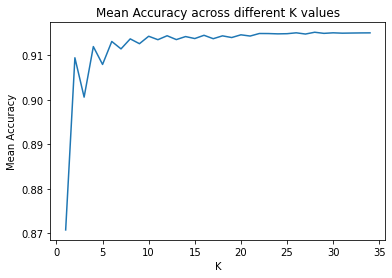

In [28]:
plt.plot(range(1,35),grid.cv_results_['mean_test_score'])
plt.xlabel('K')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy across different K values')

From the plot above, the best K-value for KNN should be 20, because the mean accuracy is similar after 20, and we want to prevent the model from going too complex

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [30]:
y_pred = knn_model.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 91.32%


In [31]:
print('f1 score on train data: ', f1_score(y_true = y_train, y_pred = knn_model.predict(X_train)))
print('recall on train data: ', recall_score(y_true = y_train, y_pred = knn_model.predict(X_train)))

f1 score on train data:  0.0947535160562569
recall on train data:  0.051721427448514386


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


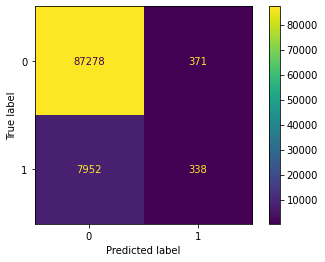

In [32]:
plot_confusion_matrix(knn_model, X_test, y_test) 

Using K- Fold cross validation, we found that the accuracy for the model lies around 91.26% to 91.64%

In [33]:
k = KFold(n_splits=10, random_state=1, shuffle=True)
kf =KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(knn_model,X_train,y_train, cv=k, n_jobs = -1)

print("Mean Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
print("Max Accuracy: {:.2f} %".format(scores.max()*100))


Mean Accuracy: 91.45 %
Standard Deviation: 0.19 %
Max Accuracy: 91.72 %


Next, we want to find the mean squared error

In [34]:
mse_scorer = make_scorer(mean_squared_error)
rmse_score = cross_val_score(knn_model, X_train,y_train, cv=k, scoring=mse_scorer)
print(f'Scores for each fold: {rmse_score}')

Scores for each fold: [0.08509783 0.08465112 0.08447244 0.08424908 0.08576789 0.08634861
 0.08277865 0.0866205  0.09019433 0.08501229]


## Logistic Regression

In [35]:
scaler = StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logistic = LogisticRegression()

pipe = Pipeline(steps=[("scaler", scaler), ("imputer", imp), ("logistic", logistic)])

# you don't need to modify the max_iter param. If you do, keep it under 1000
param_grid = {
    'logistic__solver': ['saga', 'liblinear'],
    'logistic__penalty': ['l1', 'l2']
     # hint, prefix your param names with logistic__ to pass it to the logistic step
}
logistic = LogisticRegression()

In [36]:
gscv = GridSearchCV(pipe, param_grid, cv = 7, scoring = 'f1_micro')

In [37]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('imputer', SimpleImputer()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['saga', 'liblinear']},
             scoring='f1_micro')

In [38]:
print('Best Penalty:', gscv.best_estimator_.get_params()['logistic__penalty'])
print('Best Solver:', gscv.best_estimator_.get_params()['logistic__solver'])

Best Penalty: l1
Best Solver: liblinear


In [39]:
logistic = LogisticRegression(penalty = 'l1', solver = 'saga')
logistic_model = logistic.fit(X_train, y_train)

In [40]:
y_pred = logistic_model.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 91.42%


In [41]:
print('f1 score on train data: ', f1_score(y_true = y_train, y_pred = logistic_model.predict(X_train)))
print('recall on train data: ', recall_score(y_true = y_train, y_pred = logistic_model.predict(X_train)))


f1 score on train data:  0.16195589475085415
recall on train data:  0.09563485825079913


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


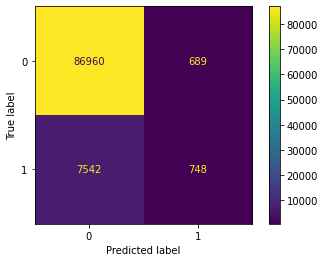

In [42]:
plot_confusion_matrix(logistic_model, X_test, y_test)  

Using K- Fold cross validation, we found that the accuracy for the model lies around 91.45% to 91.69%

In [43]:
k = KFold(n_splits=10, random_state=1, shuffle=True)
kf =KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(logistic_model,X_train,y_train, cv=k, n_jobs = -1)

print("Mean Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
print("Max Accuracy: {:.2f} %".format(scores.max()*100))

Mean Accuracy: 91.56 %
Standard Deviation: 0.12 %
Max Accuracy: 91.70 %


Next, we want to find the mean squared error 

In [44]:
mse_scorer = make_scorer(mean_squared_error)
rmse_score = cross_val_score(logistic_model, X_train,y_train, cv=k, scoring=mse_scorer)
print(f'Scores for each fold: {rmse_score}')

Scores for each fold: [0.08456178 0.08389172 0.08366836 0.08317699 0.08496382 0.08541052
 0.08304668 0.08411883 0.08711191 0.08353808]


# Random Forest 

In [ ]:
# Inital Grid with only 1 param
RFC_test = RandomForestClassifier(random_state=0)
parameters = {'max_depth': range(1, 12)}
grid = GridSearchCV(RFC_test , parameters, verbose = 3)
grid.fit(X, y)
# View the Grid Search CV Results
print(grid.cv_results_)


Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END .......................max_depth=1;, score=0.914 total time=   6.8s
[CV 2/5] END .......................max_depth=1;, score=0.914 total time=   4.7s
[CV 3/5] END .......................max_depth=1;, score=0.914 total time=   8.1s
[CV 4/5] END .......................max_depth=1;, score=0.914 total time=   6.6s
[CV 5/5] END .......................max_depth=1;, score=0.914 total time=   6.2s
[CV 1/5] END .......................max_depth=2;, score=0.914 total time=   9.8s
[CV 2/5] END .......................max_depth=2;, score=0.914 total time=   8.3s
[CV 3/5] END .......................max_depth=2;, score=0.914 total time=   6.1s
[CV 4/5] END .......................max_depth=2;, score=0.914 total time=  12.8s
[CV 5/5] END .......................max_depth=2;, score=0.914 total time=  10.6s
[CV 1/5] END .......................max_depth=3;, score=0.914 total time=   7.8s
[CV 2/5] END .......................max_depth=3;

Text(0.5, 1.0, 'Mean Accuracy across different Max Depth')

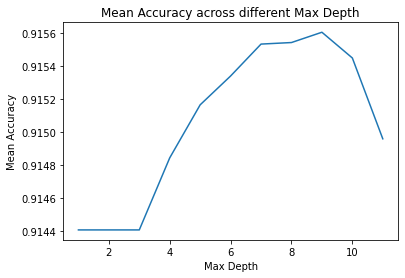

In [ ]:
plt.plot(range(1,12),grid.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy across different Max Depth')

In [ ]:
# Grid with more parameters
RFC_test = RandomForestClassifier(random_state=0)
scorings = ['recall','accuracy']
parameters = {'max_depth': range(2, 12), 'min_samples_leaf':[15,20,25,30],'n_estimators':[100,150,200,250]}
RFCgrid = GridSearchCV(RFC_test , parameters, scoring = scorings, refit = 'accuracy', verbose = 3).fit(X_train, y_train)
print("The Best Model is : ", RFCgrid.best_estimator_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END max_depth=2, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.915) recall: (test=0.000) total time=   3.5s
[CV 2/5] END max_depth=2, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.915) recall: (test=0.000) total time=   3.5s
[CV 3/5] END max_depth=2, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.915) recall: (test=0.000) total time=   3.5s
[CV 4/5] END max_depth=2, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.915) recall: (test=0.000) total time=   3.5s
[CV 5/5] END max_depth=2, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.915) recall: (test=0.000) total time=   3.5s
[CV 1/5] END max_depth=2, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.915) recall: (test=0.000) total time=   5.2s
[CV 2/5] END max_depth=2, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.915) recall: (test=0.000) total time=   5.2s
[CV 3/5] END max_depth=2, min_samples_lea

NameError: ignored

In [ ]:
# Follow up in range
RFC_test = RandomForestClassifier(random_state=0,)
scorings = ['recall','accuracy']
parameters = {'max_depth': range(8, 12), 'min_samples_leaf':[15,20, 25, 30],'n_estimators':[100,150,200,250]}
RFCgrid = GridSearchCV(RFC_test , parameters, scoring = scorings, refit = 'accuracy', verbose = 3).fit(X_train, y_train)
print("The Best Model is : ", RFCgrid.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END max_depth=8, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.916) recall: (test=0.047) total time=   7.3s
[CV 2/5] END max_depth=8, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.916) recall: (test=0.051) total time=   7.3s
[CV 3/5] END max_depth=8, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.916) recall: (test=0.047) total time=   7.1s
[CV 4/5] END max_depth=8, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.915) recall: (test=0.042) total time=   7.2s
[CV 5/5] END max_depth=8, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.916) recall: (test=0.044) total time=   7.3s
[CV 1/5] END max_depth=8, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.916) recall: (test=0.048) total time=  11.4s
[CV 2/5] END max_depth=8, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.916) recall: (test=0.051) total time=  10.7s
[CV 3/5] END max_depth=8, min_samples_leaf

In [ ]:
# Refined grid with balanced class_weight
RFC_test = RandomForestClassifier(random_state=0, class_weight = 'balanced')
scorings = ['recall','accuracy']
parameters = {'max_depth': range(7, 11), 'min_samples_leaf':[15,20],'n_estimators':[100,150,200]}
RFCgrid = GridSearchCV(RFC_test , parameters, scoring = scorings, refit = 'accuracy', verbose = 3, cv = 3).fit(X_train, y_train)
print("The Best Model is : ", RFCgrid.best_estimator_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END max_depth=7, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.698) recall: (test=0.821) total time=   9.5s
[CV 2/3] END max_depth=7, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.710) recall: (test=0.804) total time=   6.1s
[CV 3/3] END max_depth=7, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.706) recall: (test=0.815) total time=   6.1s
[CV 1/3] END max_depth=7, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.699) recall: (test=0.821) total time=   9.1s
[CV 2/3] END max_depth=7, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.710) recall: (test=0.804) total time=   9.1s
[CV 3/3] END max_depth=7, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.705) recall: (test=0.813) total time=   9.2s
[CV 1/3] END max_depth=7, min_samples_leaf=15, n_estimators=200; accuracy: (test=0.704) recall: (test=0.815) total time=  12.2s
[CV 2/3] END max_depth=7, min_samples_leaf=

In [ ]:
# Follow up grid with balanced class_weight
RFC_test = RandomForestClassifier(random_state=0, class_weight = 'balanced')
scorings = ['recall','accuracy']
parameters = {'max_depth': [6,9,12], 'min_samples_leaf':[15,20],'n_estimators':[100,150,200]}
RFCgrid = GridSearchCV(RFC_test , parameters, scoring = scorings, refit = 'accuracy', verbose = 3, cv = 3).fit(X_train, y_train)
print("The Best Model is : ", RFCgrid.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END max_depth=6, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.711) recall: (test=0.806) total time=   5.7s
[CV 2/3] END max_depth=6, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.720) recall: (test=0.790) total time=   5.6s
[CV 3/3] END max_depth=6, min_samples_leaf=15, n_estimators=100; accuracy: (test=0.709) recall: (test=0.807) total time=   5.7s
[CV 1/3] END max_depth=6, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.706) recall: (test=0.810) total time=   8.4s
[CV 2/3] END max_depth=6, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.720) recall: (test=0.790) total time=   8.4s
[CV 3/3] END max_depth=6, min_samples_leaf=15, n_estimators=150; accuracy: (test=0.709) recall: (test=0.806) total time=   8.4s
[CV 1/3] END max_depth=6, min_samples_leaf=15, n_estimators=200; accuracy: (test=0.709) recall: (test=0.807) total time=  11.4s
[CV 2/3] END max_depth=6, min_samples_leaf=

So we can see that the maximum depth does not have a significant impact on prediction accuracy for random forest algorithm as the result we might want to choose a relatively small depth so that the computation is not too time-consuming. So our depth range should be around 8 like the tree algorithm

In [ ]:
RFC_2 = RandomForestClassifier(max_depth = 8, random_state = 0)
RFC_2.fit(X_train, y_train)
RFC_2.score(X_test, y_test)

0.9148625689240037

In [ ]:
print('f1 score on train data: ', f1_score(y_true = y_train, y_pred = RFC_2.predict(X_train))) 
print('recall on train data: ', recall_score(y_true = y_train, y_pred = RFC_2.predict(X_train)))

f1 score on train data:  0.09408615476131461
recall on train data:  0.04948378350192929


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


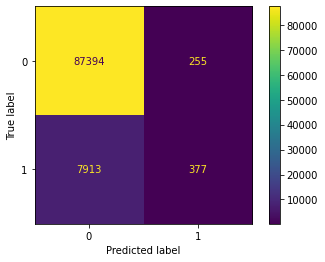

In [ ]:
plot_confusion_matrix(RFC_2, X_test, y_test)  

Using K- Fold cross validation, we found that the accuracy for the model lies around 91.44% to 91.72%

In [ ]:
k = KFold(n_splits=10, random_state=1, shuffle=True)
kf =KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(RFC_2,X_train,y_train, cv=k, n_jobs = -1)

print("Mean Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
print("Max Accuracy: {:.2f} %".format(scores.max()*100))

Mean Accuracy: 91.58 %
Standard Deviation: 0.14 %
Max Accuracy: 91.81 %


Next, we want to find the mean square error of the model

In [ ]:
mse_scorer = make_scorer(mean_squared_error)
rmse_score = cross_val_score(RFC_2, X_train,y_train, cv=k, scoring=mse_scorer)
print(f'Scores for each fold: {rmse_score}')


NameError: ignored

In [45]:
# Our best models
best_logistic = Pipeline(steps=[('scaler', StandardScaler()),
                                ('logistic',LogisticRegression(class_weight='balanced', random_state=0,solver='saga'))])
best_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=2,min_samples_leaf=15, random_state=0)
best_forest = RandomForestClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=15, n_estimators=200, random_state=0)

In [46]:
# 10-fold cross validation on total data for Random Forest model
k = KFold(n_splits=10, random_state=1, shuffle=True)

# Make a mean squared error scorer for evaluation
mse_scorer = make_scorer(mean_squared_error)
rmse_score = cross_val_score(best_forest, X,y,cv=k, scoring=mse_scorer)

# Make a auc_roc scorer for evaluation
roc_scorer = make_scorer(roc_auc_score)
roc_score = cross_val_score(best_forest, X, y, cv = k, scoring = roc_scorer)

scores = cross_val_score(best_forest,X,y, cv=k, n_jobs = -1)

print("Mean Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))
print("Max Accuracy: {:.2f} %".format(scores.max()*100))
print('MSE for each fold: ', rmse_score)
print("auc_roc score for each fold:",  {roc_score})

NameError: ignored